In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows",1200)
pd.set_option("display.max_columns",50)

sns.set(font_scale=2)

np.random.seed(5)

from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,CAS1,CAS2,CAS3,CH1,CH2,CH3,CH4,TE1,TE2,TE3,TE4,OC1,OC2,JC1,JC2,JC3,bad_credit
0,48,5951,2,2,22,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1
1,12,2096,2,3,49,1,2,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
2,42,7882,2,4,45,1,2,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0
3,24,4870,3,4,53,2,2,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
4,36,9055,2,4,35,1,2,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0


In [4]:
df.shape

(1011, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 24 columns):
loan_duration_mo       1011 non-null int64
loan_amount            1011 non-null int64
payment_pcnt_income    1011 non-null int64
time_in_residence      1011 non-null int64
age_yrs                1011 non-null int64
number_loans           1011 non-null int64
dependents             1011 non-null int64
CAS1                   1011 non-null int64
CAS2                   1011 non-null int64
CAS3                   1011 non-null int64
CH1                    1011 non-null int64
CH2                    1011 non-null int64
CH3                    1011 non-null int64
CH4                    1011 non-null int64
TE1                    1011 non-null int64
TE2                    1011 non-null int64
TE3                    1011 non-null int64
TE4                    1011 non-null int64
OC1                    1011 non-null int64
OC2                    1011 non-null int64
JC1                    1011 non-n

In [6]:
df.describe()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,CAS1,CAS2,CAS3,CH1,CH2,CH3,CH4,TE1,TE2,TE3,TE4,OC1,OC2,JC1,JC2,JC3,bad_credit
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.00000,1011.000000,1011.000000
mean,20.868447,3267.196835,2.969337,2.841741,35.552918,1.406528,1.155292,0.270030,0.063304,0.394659,0.048467,0.534125,0.087043,0.290801,0.171118,0.342235,0.174085,0.250247,0.046489,0.815035,0.200791,0.62908,0.147379,0.298714
std,12.028247,2818.261437,1.118720,1.105646,11.357116,0.580131,0.362362,0.444195,0.243629,0.489019,0.214857,0.499081,0.282037,0.454357,0.376798,0.474693,0.379370,0.433370,0.210645,0.388462,0.400791,0.48329,0.354659,0.457921
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,12.000000,1365.000000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,18.000000,2315.000000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,24.000000,3972.500000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


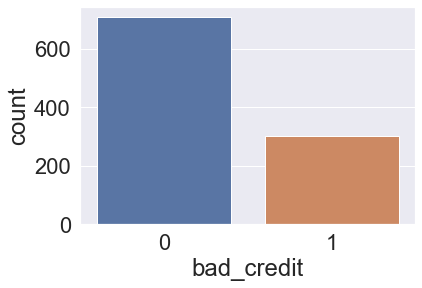

In [7]:
sns.countplot(df.bad_credit)
plt.show()

In [8]:
df['bad_credit'].value_counts()

0    709
1    302
Name: bad_credit, dtype: int64

### Standardize the numerical columns

In [9]:
numeric_features = ['loan_duration_mo','loan_amount','payment_pcnt_income','time_in_residence','age_yrs',
                    'number_loans','dependents']
minmax = MinMaxScaler()

In [10]:
transformer = ColumnTransformer([('mm',minmax,numeric_features)], remainder='passthrough')

In [11]:
transformed_X = transformer.fit_transform(df)

In [12]:
transformed_X

array([[0.64705882, 0.31368989, 0.33333333, ..., 1.        , 0.        ,
        1.        ],
       [0.11764706, 0.10157368, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.55882353, 0.41994057, 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.11764706, 0.03048311, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.60294118, 0.08776274, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.60294118, 0.23803235, 0.66666667, ..., 1.        , 0.        ,
        0.        ]])

In [13]:
pd.DataFrame(transformed_X,columns=df.columns)

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,CAS1,CAS2,CAS3,CH1,CH2,CH3,CH4,TE1,TE2,TE3,TE4,OC1,OC2,JC1,JC2,JC3,bad_credit
0,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.470588,0.484483,0.333333,1.000000,0.285714,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,0.294118,0.142236,0.666667,1.000000,0.607143,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.470588,0.368548,0.333333,0.333333,0.285714,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,0.117647,0.154561,0.333333,1.000000,0.750000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,0.382353,0.274238,1.000000,0.333333,0.160714,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
9,0.117647,0.057500,0.666667,0.000000,0.107143,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [14]:
df2 = pd.DataFrame(transformed_X,columns=df.columns)

In [16]:
df2.head()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,CAS1,CAS2,CAS3,CH1,CH2,CH3,CH4,TE1,TE2,TE3,TE4,OC1,OC2,JC1,JC2,JC3,bad_credit
0,0.647059,0.313690,0.333333,0.333333,0.053571,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.117647,0.101574,0.333333,0.666667,0.535714,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.558824,0.419941,0.333333,1.000000,0.464286,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.294118,0.254209,0.666667,1.000000,0.607143,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.470588,0.484483,0.333333,1.000000,0.285714,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [17]:
df2.shape

(1011, 24)

In [18]:
df2.describe()

,loan_duration_mo,loan_amount,payment_pcnt_income,time_in_residence,age_yrs,number_loans,dependents,CAS1,CAS2,CAS3,CH1,CH2,CH3,CH4,TE1,TE2,TE3,TE4,OC1,OC2,JC1,JC2,JC3,bad_credit
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.00000,1011.000000,1011.000000
mean,0.248065,0.166017,0.656446,0.613914,0.295588,0.135509,0.155292,0.270030,0.063304,0.394659,0.048467,0.534125,0.087043,0.290801,0.171118,0.342235,0.174085,0.250247,0.046489,0.815035,0.200791,0.62908,0.147379,0.298714
std,0.176886,0.155071,0.372907,0.368549,0.202806,0.193377,0.362362,0.444195,0.243629,0.489019,0.214857,0.499081,0.282037,0.454357,0.376798,0.474693,0.379370,0.433370,0.210645,0.388462,0.400791,0.48329,0.354659,0.457921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.117647,0.061351,0.333333,0.333333,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,0.205882,0.113624,0.666667,0.666667,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000
75%,0.294118,0.204826,1.000000,1.000000,0.410714,0.333333,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [19]:
#Save to csv
#df2.to_csv("train2.csv",index=False)